<a href="https://colab.research.google.com/github/vlamen/tue-deeplearning/blob/main/assignments/assignment_2_3/a2_skeleton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group Number:

# Student 1: Kaiting Liu

# Student 2: Sihan Zhu

# Student 3: Ruozhu Yao

# Downloading Data and Preliminaries

In [ ]:
import pickle
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from zipfile import ZipFile
import requests
import io

In [ ]:
def load_zip(url):
    response = requests.get(url)
    response.raise_for_status()
    zipf = ZipFile(io.BytesIO(response.content))
    return {name: zipf.read(name) for name in zipf.namelist()}

def load_array(zipfile, fn):
    return np.load(io.BytesIO(zipfile[fn]))

In [ ]:
"""
This cell loads the training, validation or test data as numpy arrays,
with the positions, initial velocities and charge data of the particles.

The position arrays are shaped as
[simulation id, time point (corresponding to t = 0, 0.5, 1 or 1.5), x/y spatial dimension, particle id].

The initial velocity arrays are shaped as
[simulation id, 1 (corresponding to t=0), x/y spatial dimension, particle id].

The charge arrays are shaped as [simulation id, particle id, 1]

"""

data = load_zip('https://surfdrive.surf.nl/files/index.php/s/OIgda2ZRG8v0eqB/download')

features = ['positions', 'velocities', 'charges']
    
positions_train, velocities_train, charges_train = (load_array(data, f'data/train/{f}.npy') for f in features)
positions_valid, velocities_valid, charges_valid = (load_array(data, f'data/valid/{f}.npy') for f in features)
positions_test, velocities_test, charges_test = (load_array(data, f'data/test/{f}.npy') for f in features)

print('Shapes of the training data:\n')
print(f'positions: {positions_train.shape}')
print(f'velocities: {velocities_train.shape}')
print(f'charges: {charges_train.shape}')

Shapes of the training data:

positions: (10000, 4, 2, 5)
velocities: (10000, 1, 2, 5)
charges: (10000, 5, 1)


In [ ]:
print('An example of retrieving data from the arrays:\n\n')

sim_idx = 42
t_idx = 2  # t_idx 0, 1, 2, 3 corresponds to t=0, 0.5, 1 and 1.5 respectively
spatial_idx = (0,1)  # corresponds to both x and y dimension
particle_idx = 3  # corresponds to particle with index 3

p = positions_train[sim_idx, t_idx, spatial_idx, particle_idx]
v = velocities_train[sim_idx, 0, spatial_idx, particle_idx]  # note: this array contains only the inital velocity -> hence the 0
c = charges_train[sim_idx, particle_idx, 0] 

print(
    f'In simulation {sim_idx} of the training set, particle {particle_idx} with charge {c} had coordinates {p}.\nThe initial velocity of this particle was {v}.'
)

An example of retrieving data from the arrays:


In simulation 42 of the training set, particle 3 with charge -1.0 had coordinates [ 2.05159559 -1.46130851].
The initial velocity of this particle was [ 0.28402364 -0.24784824].


In [ ]:
print('Overview of no. datapoints:\n')

print(f'{len(positions_train)} train, {len(positions_valid)} validation, {len(positions_test)} test simulations')

Overview of no. datapoints:

10000 train, 2000 validation, 2000 test simulations


In [ ]:
def plot_example(pos, vel):

    fig = plt.figure()
    axes = plt.gca()
    axes.set_xlim([-5., 5.])
    axes.set_ylim([-5., 5.])
    colors = ['red', 'blue', 'green', 'orange', 'brown']
    for i in range(pos.shape[-1]):
        plt.plot(pos[0, 0, i], pos[0, 1, i], 'd', color=colors[i])
        plt.plot(pos[-1, 0, i], pos[-1, 1, i], 'x', color=colors[i])
        plt.plot([pos[0, 0, i], pos[0, 0, i] + vel[0, 0, i]], [pos[0, 1, i], pos[0, 1, i] + vel[0, 1, i]], '--', color=colors[i])
    fig.set_size_inches(7, 7)
    plt.xlim(np.min(pos)-1, np.max(pos) +1)
    plt.ylim(np.min(pos)-1, np.max(pos) +1)
    plt.plot([], [], 'd', color='black', label='initial position')
    plt.plot([], [], 'x', color='black', label='final position')
    plt.plot([], [], '--', color='black', label='initial velocity \ndirection and magnitude')
    plt.legend()
    
    plt.show()
    return

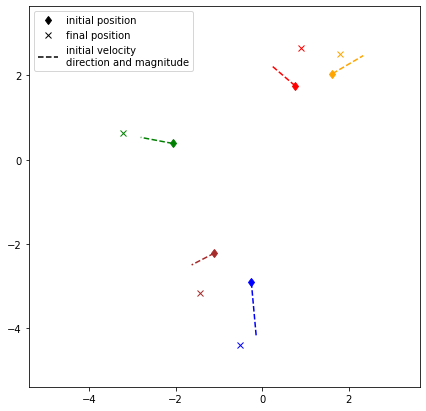

In [ ]:
random_idx = np.random.randint(0, 10000)
plot_example(positions_train[random_idx], velocities_train[random_idx])

# Data Handling and Preprocessing

In [ ]:
#todo

In [ ]:
import torch
from torchvision import transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, TensorDataset
import numpy as np
from PIL import Image

def data_transformation(positions, velocities, charges):
    """
    Transform the original set of 6 images to the set of 3 images, 
    (anchor, support image has same character, support image has different character)
    """
    positions_start = positions[:, 0, :, :]
    velocities_start = velocities[:, 0, :, :]
    charges_start = charges[:, :, :]

    temp = np.concatenate((positions_start, velocities_start), axis=1)
    temp = np.moveaxis(temp, 1, 2)
    input_data = np.concatenate((temp,charges_start), axis=2)

    positions_end = np.moveaxis(positions, 2, 3)
    label_data_1 = positions_end[:, 1, :, :]
    label_data_2 = positions_end[:, 2, :, :]
    label_data_3 = positions_end[:, 3, :, :]

    return input_data, label_data_1, label_data_2, label_data_3

class MyDataset(Dataset):
    def __init__(self, input_data, label_data):
        self.input_data = torch.FloatTensor(input_data)
        self.label_data = torch.FloatTensor(label_data)
        
    def __getitem__(self, index):
        input = self.input_data[index, :, :]
        label = self.label_data[index, :, :]
        return input, label
        
    def __len__(self):
        return len(self.label_data)

# Model Implementation

In [ ]:
#todo

In [ ]:
## Model Definition ##
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()

        """Embedding extraction, use aggregation function here to utilize neighborhood info""" 
        self.embedding = nn.Sequential(nn.Linear(10, 5), nn.BatchNorm1d(5,momentum=1,affine=True), nn.Sigmoid())

        """Multilayer Perceptron."""
        self.MLP = nn.Sequential(
            nn.Linear(5, 32),
            nn.BatchNorm1d(32,momentum=1,affine=True),
            nn.ReLU(inplace=True),  
            nn.Linear(32, 32),
            nn.BatchNorm1d(32,momentum=1,affine=True),
            nn.ReLU(inplace=True),  
            nn.Linear(32, 2)
        )

    def aggregate(self, x, neighbors):
        """aggregate the info of set for x"""
        neighbors_info = torch.mean(neighbors, axis=1)
        return torch.concat((x,neighbors_info), axis=1)

    def forward(self, input):
        """Perform forward"""
        positions = []
        for idx in range(5):
          aggregation = self.aggregate(input[:, idx, :], np.delete(input, idx, axis=1))
          embedding = self.embedding(aggregation)
          position = self.MLP(embedding)
          positions.append(position)
        positions = torch.stack(positions)
        positions = torch.moveaxis(positions, 0, 1)
        return positions

    def predict(self, input):
        """Perform forward"""
        positions = []
        for idx in range(5):
          aggregation = self.aggregate(input[:, idx, :], np.delete(input, idx, axis=1))
          embedding = self.embedding(aggregation)
          position = self.MLP(embedding)
          positions.append(position)
        positions = torch.stack(positions)
        positions = torch.moveaxis(positions, 0, 1)
        return positions


    def accuracy(self, batch):
      """
      using full accuracy to evaluate our model performance, 
      by predicting one set is correct when all the images in the set is predicted correctly.
      """
      inputs, labels = batch
      predictions = self.predict(inputs)
      cos = nn.CosineSimilarity(dim=2, eps=1e-6)
      cos_sims = cos(predictions, labels)
      return cos_sims.mean(), predictions



In [ ]:
## LOSS Definition ##
class MSELoss(nn.Module):
    """
    Mean squared loss
    """

    def __init__(self):
        super(MSELoss, self).__init__()

    def forward(self, prediction, label):
        error = prediction - label
        squared_error = torch.square(error)
        losses = torch.sum(squared_error)
        return losses.mean()

# Model Training

In [ ]:
#todo

In [ ]:
import numpy as np
from tqdm import tqdm
import time

class Trainer():
    def __init__(self,
                 device: torch.device,
                 criterion: torch.nn.Module,
                 epochs: int
                 ):

        self.criterion = criterion
        self.device = device
        self.epochs = epochs


    def run_trainer(self, model, training_DataLoader, valid_DataLoader, optimizer):
        avg_losses_per_epoch=[]
        start = time.time()
        for epoch in tqdm(range(self.epochs)):
            model.train()  # train model
            train_losses=[]
            for batch in training_DataLoader:
                inputs, labels = batch
                # anchor, positive, negative = anchor.to(device=device, dtype=torch.float), positive.to(device=device, dtype=torch.float), negative.to(device=device, dtype=torch.float)
                optimizer.zero_grad()  # zerograd the parameters
                predictions = model(inputs)# one forward pass
                loss = self.criterion(predictions, labels)  # calculate loss
                
                loss_value = loss.item()
                train_losses.append(loss_value)
                
                loss.backward()  # one backward pass
                optimizer.step()  # update the parameters
            # print(
            #     f'EPOCH: {epoch+1:0>{len(str(self.epochs))}}/{self.epochs}',
            #     end=' '
            # )
            train_sim, __=trainer.evaluation(model, training_DataLoader)
            val_sim, __=trainer.evaluation(model, valid_DataLoader)
            tic = time.time()

            print(f'Epoch: {epoch+1:0>{len(str(self.epochs))}}/{self.epochs}, Train Similarity: {train_sim:.4f}, Validation Similarity: {val_sim:.4f}. Training time so far: {tic-start:.1f} s')
            avg_loss=np.mean(train_losses)
            avg_losses_per_epoch.append(avg_loss)
            print(f'LOSS: {avg_loss:.4f}',end='\n')
        plt.plot(np.linspace(1, self.epochs, self.epochs, endpoint=True), avg_losses_per_epoch)
        plt.xlabel('Number of epochs')
        plt.ylabel('Loss')
        plt.show()

    
    def evaluation(self, model, testing_DataLoader):
        accuracies = []
        predictions = []
        for batch in testing_DataLoader:
          cos_sim,prediction = model.accuracy(batch)
          accuracies.append(cos_sim.detach().numpy())
          predictions.append(prediction)
        accuracy_mean=np.mean(accuracies)
        # print(f'ACCURACY: {np.mean(accuracies):.4f}',end='\n')

        return accuracy_mean,predictions
    
    

  2%|▏         | 1/50 [00:01<00:59,  1.21s/it]

Epoch: 01/50, Train Similarity: 0.9691, Validation Similarity: 0.9684. Training time so far: 1.2 s
LOSS: 390.5074


  4%|▍         | 2/50 [00:02<00:56,  1.17s/it]

Epoch: 02/50, Train Similarity: 0.9695, Validation Similarity: 0.9691. Training time so far: 2.4 s
LOSS: 212.3773


  6%|▌         | 3/50 [00:03<00:54,  1.16s/it]

Epoch: 03/50, Train Similarity: 0.9697, Validation Similarity: 0.9695. Training time so far: 3.5 s
LOSS: 199.4085


  8%|▊         | 4/50 [00:04<00:54,  1.18s/it]

Epoch: 04/50, Train Similarity: 0.9699, Validation Similarity: 0.9696. Training time so far: 4.7 s
LOSS: 191.4797


 10%|█         | 5/50 [00:05<00:53,  1.18s/it]

Epoch: 05/50, Train Similarity: 0.9701, Validation Similarity: 0.9698. Training time so far: 5.9 s
LOSS: 185.8740


 12%|█▏        | 6/50 [00:07<00:51,  1.17s/it]

Epoch: 06/50, Train Similarity: 0.9703, Validation Similarity: 0.9700. Training time so far: 7.0 s
LOSS: 181.7552


 14%|█▍        | 7/50 [00:08<00:49,  1.15s/it]

Epoch: 07/50, Train Similarity: 0.9703, Validation Similarity: 0.9700. Training time so far: 8.2 s
LOSS: 178.9524


 16%|█▌        | 8/50 [00:09<00:47,  1.14s/it]

Epoch: 08/50, Train Similarity: 0.9699, Validation Similarity: 0.9697. Training time so far: 9.3 s
LOSS: 174.9382


 18%|█▊        | 9/50 [00:10<00:47,  1.15s/it]

Epoch: 09/50, Train Similarity: 0.9699, Validation Similarity: 0.9697. Training time so far: 10.4 s
LOSS: 172.6654


 20%|██        | 10/50 [00:11<00:46,  1.16s/it]

Epoch: 10/50, Train Similarity: 0.9703, Validation Similarity: 0.9701. Training time so far: 11.6 s
LOSS: 170.6318


 22%|██▏       | 11/50 [00:12<00:45,  1.16s/it]

Epoch: 11/50, Train Similarity: 0.9702, Validation Similarity: 0.9701. Training time so far: 12.8 s
LOSS: 168.3036


 24%|██▍       | 12/50 [00:13<00:43,  1.15s/it]

Epoch: 12/50, Train Similarity: 0.9706, Validation Similarity: 0.9705. Training time so far: 13.9 s
LOSS: 166.5830


 26%|██▌       | 13/50 [00:15<00:43,  1.17s/it]

Epoch: 13/50, Train Similarity: 0.9706, Validation Similarity: 0.9704. Training time so far: 15.1 s
LOSS: 165.3655


 28%|██▊       | 14/50 [00:16<00:42,  1.19s/it]

Epoch: 14/50, Train Similarity: 0.9711, Validation Similarity: 0.9708. Training time so far: 16.4 s
LOSS: 164.2079


 30%|███       | 15/50 [00:17<00:40,  1.16s/it]

Epoch: 15/50, Train Similarity: 0.9711, Validation Similarity: 0.9709. Training time so far: 17.5 s
LOSS: 162.9486


 32%|███▏      | 16/50 [00:18<00:39,  1.16s/it]

Epoch: 16/50, Train Similarity: 0.9710, Validation Similarity: 0.9708. Training time so far: 18.6 s
LOSS: 161.6876


 34%|███▍      | 17/50 [00:19<00:38,  1.16s/it]

Epoch: 17/50, Train Similarity: 0.9711, Validation Similarity: 0.9709. Training time so far: 19.8 s
LOSS: 160.7063


 36%|███▌      | 18/50 [00:20<00:36,  1.15s/it]

Epoch: 18/50, Train Similarity: 0.9710, Validation Similarity: 0.9709. Training time so far: 20.9 s
LOSS: 159.7849


 38%|███▊      | 19/50 [00:22<00:35,  1.16s/it]

Epoch: 19/50, Train Similarity: 0.9711, Validation Similarity: 0.9710. Training time so far: 22.1 s
LOSS: 158.8027


 40%|████      | 20/50 [00:23<00:35,  1.17s/it]

Epoch: 20/50, Train Similarity: 0.9711, Validation Similarity: 0.9710. Training time so far: 23.3 s
LOSS: 158.1241


 42%|████▏     | 21/50 [00:24<00:33,  1.17s/it]

Epoch: 21/50, Train Similarity: 0.9712, Validation Similarity: 0.9710. Training time so far: 24.4 s
LOSS: 157.0828


 44%|████▍     | 22/50 [00:25<00:32,  1.16s/it]

Epoch: 22/50, Train Similarity: 0.9712, Validation Similarity: 0.9711. Training time so far: 25.6 s
LOSS: 156.2345


 46%|████▌     | 23/50 [00:26<00:31,  1.16s/it]

Epoch: 23/50, Train Similarity: 0.9712, Validation Similarity: 0.9711. Training time so far: 26.7 s
LOSS: 155.6350


 48%|████▊     | 24/50 [00:27<00:30,  1.16s/it]

Epoch: 24/50, Train Similarity: 0.9712, Validation Similarity: 0.9711. Training time so far: 27.9 s
LOSS: 154.8306


 50%|█████     | 25/50 [00:29<00:29,  1.16s/it]

Epoch: 25/50, Train Similarity: 0.9713, Validation Similarity: 0.9711. Training time so far: 29.1 s
LOSS: 154.2348


 52%|█████▏    | 26/50 [00:30<00:27,  1.15s/it]

Epoch: 26/50, Train Similarity: 0.9713, Validation Similarity: 0.9711. Training time so far: 30.2 s
LOSS: 153.4299


 54%|█████▍    | 27/50 [00:31<00:26,  1.14s/it]

Epoch: 27/50, Train Similarity: 0.9713, Validation Similarity: 0.9711. Training time so far: 31.3 s
LOSS: 152.9666


 56%|█████▌    | 28/50 [00:32<00:25,  1.15s/it]

Epoch: 28/50, Train Similarity: 0.9713, Validation Similarity: 0.9711. Training time so far: 32.5 s
LOSS: 152.5495


 58%|█████▊    | 29/50 [00:33<00:24,  1.15s/it]

Epoch: 29/50, Train Similarity: 0.9713, Validation Similarity: 0.9710. Training time so far: 33.6 s
LOSS: 152.0775


 60%|██████    | 30/50 [00:34<00:22,  1.14s/it]

Epoch: 30/50, Train Similarity: 0.9714, Validation Similarity: 0.9710. Training time so far: 34.7 s
LOSS: 151.5064


 62%|██████▏   | 31/50 [00:35<00:21,  1.13s/it]

Epoch: 31/50, Train Similarity: 0.9714, Validation Similarity: 0.9710. Training time so far: 35.8 s
LOSS: 151.0678


 64%|██████▍   | 32/50 [00:36<00:20,  1.12s/it]

Epoch: 32/50, Train Similarity: 0.9715, Validation Similarity: 0.9710. Training time so far: 36.9 s
LOSS: 150.6578


 66%|██████▌   | 33/50 [00:38<00:18,  1.11s/it]

Epoch: 33/50, Train Similarity: 0.9715, Validation Similarity: 0.9710. Training time so far: 38.0 s
LOSS: 150.3177


 68%|██████▊   | 34/50 [00:39<00:17,  1.12s/it]

Epoch: 34/50, Train Similarity: 0.9716, Validation Similarity: 0.9710. Training time so far: 39.2 s
LOSS: 150.1878


 70%|███████   | 35/50 [00:40<00:16,  1.12s/it]

Epoch: 35/50, Train Similarity: 0.9716, Validation Similarity: 0.9710. Training time so far: 40.3 s
LOSS: 149.3326


 72%|███████▏  | 36/50 [00:41<00:16,  1.14s/it]

Epoch: 36/50, Train Similarity: 0.9717, Validation Similarity: 0.9710. Training time so far: 41.5 s
LOSS: 149.1713


 74%|███████▍  | 37/50 [00:42<00:14,  1.14s/it]

Epoch: 37/50, Train Similarity: 0.9718, Validation Similarity: 0.9710. Training time so far: 42.6 s
LOSS: 148.6862


 76%|███████▌  | 38/50 [00:43<00:13,  1.13s/it]

Epoch: 38/50, Train Similarity: 0.9719, Validation Similarity: 0.9710. Training time so far: 43.7 s
LOSS: 148.3338


 78%|███████▊  | 39/50 [00:44<00:12,  1.13s/it]

Epoch: 39/50, Train Similarity: 0.9719, Validation Similarity: 0.9710. Training time so far: 44.8 s
LOSS: 147.8228


 80%|████████  | 40/50 [00:45<00:11,  1.13s/it]

Epoch: 40/50, Train Similarity: 0.9719, Validation Similarity: 0.9710. Training time so far: 46.0 s
LOSS: 147.6052


 82%|████████▏ | 41/50 [00:47<00:10,  1.12s/it]

Epoch: 41/50, Train Similarity: 0.9720, Validation Similarity: 0.9710. Training time so far: 47.1 s
LOSS: 147.1952


 84%|████████▍ | 42/50 [00:48<00:09,  1.14s/it]

Epoch: 42/50, Train Similarity: 0.9720, Validation Similarity: 0.9711. Training time so far: 48.3 s
LOSS: 146.7320


 86%|████████▌ | 43/50 [00:49<00:07,  1.13s/it]

Epoch: 43/50, Train Similarity: 0.9719, Validation Similarity: 0.9711. Training time so far: 49.4 s
LOSS: 146.6688


 88%|████████▊ | 44/50 [00:50<00:06,  1.13s/it]

Epoch: 44/50, Train Similarity: 0.9720, Validation Similarity: 0.9711. Training time so far: 50.5 s
LOSS: 146.3931


 90%|█████████ | 45/50 [00:51<00:05,  1.13s/it]

Epoch: 45/50, Train Similarity: 0.9720, Validation Similarity: 0.9711. Training time so far: 51.6 s
LOSS: 146.0161


 92%|█████████▏| 46/50 [00:52<00:04,  1.12s/it]

Epoch: 46/50, Train Similarity: 0.9720, Validation Similarity: 0.9712. Training time so far: 52.7 s
LOSS: 145.6328


 94%|█████████▍| 47/50 [00:53<00:03,  1.13s/it]

Epoch: 47/50, Train Similarity: 0.9720, Validation Similarity: 0.9713. Training time so far: 53.9 s
LOSS: 145.2832


 96%|█████████▌| 48/50 [00:55<00:02,  1.13s/it]

Epoch: 48/50, Train Similarity: 0.9721, Validation Similarity: 0.9713. Training time so far: 55.0 s
LOSS: 145.0181


 98%|█████████▊| 49/50 [00:56<00:01,  1.14s/it]

Epoch: 49/50, Train Similarity: 0.9721, Validation Similarity: 0.9713. Training time so far: 56.2 s
LOSS: 144.5857


100%|██████████| 50/50 [00:57<00:00,  1.15s/it]

Epoch: 50/50, Train Similarity: 0.9722, Validation Similarity: 0.9712. Training time so far: 57.3 s
LOSS: 144.3972


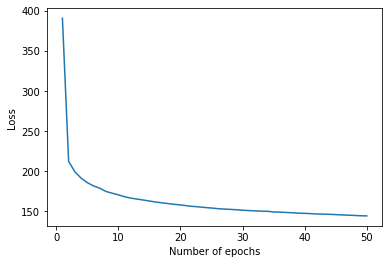

  2%|▏         | 1/50 [00:01<00:53,  1.10s/it]

Epoch: 01/50, Train Similarity: 0.9533, Validation Similarity: 0.9532. Training time so far: 1.1 s
LOSS: 618.5096


  4%|▍         | 2/50 [00:02<00:57,  1.21s/it]

Epoch: 02/50, Train Similarity: 0.9539, Validation Similarity: 0.9538. Training time so far: 2.4 s
LOSS: 343.3202


  6%|▌         | 3/50 [00:03<00:55,  1.18s/it]

Epoch: 03/50, Train Similarity: 0.9541, Validation Similarity: 0.9539. Training time so far: 3.5 s
LOSS: 327.0035


  8%|▊         | 4/50 [00:04<00:52,  1.15s/it]

Epoch: 04/50, Train Similarity: 0.9545, Validation Similarity: 0.9543. Training time so far: 4.6 s
LOSS: 318.3391


 10%|█         | 5/50 [00:05<00:53,  1.18s/it]

Epoch: 05/50, Train Similarity: 0.9544, Validation Similarity: 0.9543. Training time so far: 5.9 s
LOSS: 311.9439


 12%|█▏        | 6/50 [00:07<00:51,  1.17s/it]

Epoch: 06/50, Train Similarity: 0.9544, Validation Similarity: 0.9544. Training time so far: 7.0 s
LOSS: 305.1774


 14%|█▍        | 7/50 [00:08<00:49,  1.15s/it]

Epoch: 07/50, Train Similarity: 0.9545, Validation Similarity: 0.9545. Training time so far: 8.1 s
LOSS: 301.4259


 16%|█▌        | 8/50 [00:09<00:48,  1.14s/it]

Epoch: 08/50, Train Similarity: 0.9551, Validation Similarity: 0.9550. Training time so far: 9.3 s
LOSS: 296.5595


 18%|█▊        | 9/50 [00:10<00:46,  1.13s/it]

Epoch: 09/50, Train Similarity: 0.9552, Validation Similarity: 0.9552. Training time so far: 10.3 s
LOSS: 294.2865


 20%|██        | 10/50 [00:11<00:44,  1.12s/it]

Epoch: 10/50, Train Similarity: 0.9552, Validation Similarity: 0.9552. Training time so far: 11.5 s
LOSS: 288.4241


 22%|██▏       | 11/50 [00:12<00:43,  1.12s/it]

Epoch: 11/50, Train Similarity: 0.9555, Validation Similarity: 0.9555. Training time so far: 12.6 s
LOSS: 286.8731


 24%|██▍       | 12/50 [00:13<00:42,  1.12s/it]

Epoch: 12/50, Train Similarity: 0.9554, Validation Similarity: 0.9554. Training time so far: 13.7 s
LOSS: 282.7639


 26%|██▌       | 13/50 [00:14<00:42,  1.14s/it]

Epoch: 13/50, Train Similarity: 0.9552, Validation Similarity: 0.9555. Training time so far: 14.9 s
LOSS: 280.8780


 28%|██▊       | 14/50 [00:16<00:40,  1.13s/it]

Epoch: 14/50, Train Similarity: 0.9554, Validation Similarity: 0.9556. Training time so far: 16.0 s
LOSS: 277.3422


 30%|███       | 15/50 [00:17<00:39,  1.14s/it]

Epoch: 15/50, Train Similarity: 0.9555, Validation Similarity: 0.9559. Training time so far: 17.2 s
LOSS: 274.0733


 32%|███▏      | 16/50 [00:18<00:38,  1.13s/it]

Epoch: 16/50, Train Similarity: 0.9559, Validation Similarity: 0.9563. Training time so far: 18.3 s
LOSS: 271.2687


 34%|███▍      | 17/50 [00:19<00:37,  1.13s/it]

Epoch: 17/50, Train Similarity: 0.9559, Validation Similarity: 0.9566. Training time so far: 19.4 s
LOSS: 269.3530


 36%|███▌      | 18/50 [00:20<00:35,  1.12s/it]

Epoch: 18/50, Train Similarity: 0.9561, Validation Similarity: 0.9569. Training time so far: 20.5 s
LOSS: 267.2543


 38%|███▊      | 19/50 [00:21<00:34,  1.12s/it]

Epoch: 19/50, Train Similarity: 0.9562, Validation Similarity: 0.9570. Training time so far: 21.6 s
LOSS: 266.1574


 40%|████      | 20/50 [00:22<00:33,  1.12s/it]

Epoch: 20/50, Train Similarity: 0.9564, Validation Similarity: 0.9571. Training time so far: 22.7 s
LOSS: 264.5757


 42%|████▏     | 21/50 [00:23<00:32,  1.14s/it]

Epoch: 21/50, Train Similarity: 0.9565, Validation Similarity: 0.9573. Training time so far: 23.9 s
LOSS: 263.2383


 44%|████▍     | 22/50 [00:25<00:31,  1.13s/it]

Epoch: 22/50, Train Similarity: 0.9566, Validation Similarity: 0.9574. Training time so far: 25.0 s
LOSS: 262.2735


 46%|████▌     | 23/50 [00:26<00:31,  1.15s/it]

Epoch: 23/50, Train Similarity: 0.9567, Validation Similarity: 0.9574. Training time so far: 26.2 s
LOSS: 260.1568


 48%|████▊     | 24/50 [00:27<00:30,  1.17s/it]

Epoch: 24/50, Train Similarity: 0.9568, Validation Similarity: 0.9576. Training time so far: 27.4 s
LOSS: 257.9582


 50%|█████     | 25/50 [00:28<00:28,  1.16s/it]

Epoch: 25/50, Train Similarity: 0.9571, Validation Similarity: 0.9577. Training time so far: 28.6 s
LOSS: 256.7121


 52%|█████▏    | 26/50 [00:29<00:27,  1.15s/it]

Epoch: 26/50, Train Similarity: 0.9572, Validation Similarity: 0.9580. Training time so far: 29.7 s
LOSS: 254.8801


 54%|█████▍    | 27/50 [00:30<00:26,  1.15s/it]

Epoch: 27/50, Train Similarity: 0.9575, Validation Similarity: 0.9583. Training time so far: 30.9 s
LOSS: 253.1083


 56%|█████▌    | 28/50 [00:31<00:25,  1.15s/it]

Epoch: 28/50, Train Similarity: 0.9576, Validation Similarity: 0.9584. Training time so far: 32.0 s
LOSS: 251.7680


 58%|█████▊    | 29/50 [00:33<00:24,  1.15s/it]

Epoch: 29/50, Train Similarity: 0.9579, Validation Similarity: 0.9586. Training time so far: 33.1 s
LOSS: 249.8360


 60%|██████    | 30/50 [00:34<00:22,  1.14s/it]

Epoch: 30/50, Train Similarity: 0.9580, Validation Similarity: 0.9587. Training time so far: 34.3 s
LOSS: 248.1332


 62%|██████▏   | 31/50 [00:35<00:21,  1.14s/it]

Epoch: 31/50, Train Similarity: 0.9581, Validation Similarity: 0.9587. Training time so far: 35.4 s
LOSS: 246.8444


 64%|██████▍   | 32/50 [00:36<00:20,  1.13s/it]

Epoch: 32/50, Train Similarity: 0.9582, Validation Similarity: 0.9589. Training time so far: 36.5 s
LOSS: 245.5036


 66%|██████▌   | 33/50 [00:37<00:19,  1.13s/it]

Epoch: 33/50, Train Similarity: 0.9583, Validation Similarity: 0.9589. Training time so far: 37.7 s
LOSS: 244.1263


 68%|██████▊   | 34/50 [00:38<00:18,  1.14s/it]

Epoch: 34/50, Train Similarity: 0.9584, Validation Similarity: 0.9589. Training time so far: 38.8 s
LOSS: 243.2080


 70%|███████   | 35/50 [00:39<00:17,  1.14s/it]

Epoch: 35/50, Train Similarity: 0.9585, Validation Similarity: 0.9588. Training time so far: 39.9 s
LOSS: 242.4459


 72%|███████▏  | 36/50 [00:41<00:16,  1.16s/it]

Epoch: 36/50, Train Similarity: 0.9585, Validation Similarity: 0.9588. Training time so far: 41.2 s
LOSS: 241.6410


 74%|███████▍  | 37/50 [00:42<00:14,  1.15s/it]

Epoch: 37/50, Train Similarity: 0.9585, Validation Similarity: 0.9588. Training time so far: 42.3 s
LOSS: 240.9232


 76%|███████▌  | 38/50 [00:43<00:13,  1.15s/it]

Epoch: 38/50, Train Similarity: 0.9585, Validation Similarity: 0.9588. Training time so far: 43.4 s
LOSS: 240.2333


 78%|███████▊  | 39/50 [00:44<00:12,  1.14s/it]

Epoch: 39/50, Train Similarity: 0.9586, Validation Similarity: 0.9587. Training time so far: 44.5 s
LOSS: 239.5674


 80%|████████  | 40/50 [00:45<00:11,  1.14s/it]

Epoch: 40/50, Train Similarity: 0.9587, Validation Similarity: 0.9587. Training time so far: 45.7 s
LOSS: 238.9413


 82%|████████▏ | 41/50 [00:46<00:10,  1.13s/it]

Epoch: 41/50, Train Similarity: 0.9587, Validation Similarity: 0.9587. Training time so far: 46.8 s
LOSS: 238.4086


 84%|████████▍ | 42/50 [00:47<00:09,  1.14s/it]

Epoch: 42/50, Train Similarity: 0.9587, Validation Similarity: 0.9587. Training time so far: 48.0 s
LOSS: 237.7275


 86%|████████▌ | 43/50 [00:49<00:08,  1.15s/it]

Epoch: 43/50, Train Similarity: 0.9588, Validation Similarity: 0.9587. Training time so far: 49.1 s
LOSS: 237.1112


 88%|████████▊ | 44/50 [00:50<00:06,  1.15s/it]

Epoch: 44/50, Train Similarity: 0.9588, Validation Similarity: 0.9587. Training time so far: 50.3 s
LOSS: 236.6041


 90%|█████████ | 45/50 [00:51<00:05,  1.15s/it]

Epoch: 45/50, Train Similarity: 0.9589, Validation Similarity: 0.9587. Training time so far: 51.4 s
LOSS: 236.0853


 92%|█████████▏| 46/50 [00:52<00:04,  1.16s/it]

Epoch: 46/50, Train Similarity: 0.9589, Validation Similarity: 0.9587. Training time so far: 52.6 s
LOSS: 235.5882


 94%|█████████▍| 47/50 [00:53<00:03,  1.17s/it]

Epoch: 47/50, Train Similarity: 0.9590, Validation Similarity: 0.9587. Training time so far: 53.8 s
LOSS: 235.1917


 96%|█████████▌| 48/50 [00:54<00:02,  1.16s/it]

Epoch: 48/50, Train Similarity: 0.9590, Validation Similarity: 0.9587. Training time so far: 55.0 s
LOSS: 234.7445


 98%|█████████▊| 49/50 [00:56<00:01,  1.16s/it]

Epoch: 49/50, Train Similarity: 0.9591, Validation Similarity: 0.9587. Training time so far: 56.1 s
LOSS: 234.2737


100%|██████████| 50/50 [00:57<00:00,  1.15s/it]

Epoch: 50/50, Train Similarity: 0.9591, Validation Similarity: 0.9587. Training time so far: 57.3 s
LOSS: 233.8452


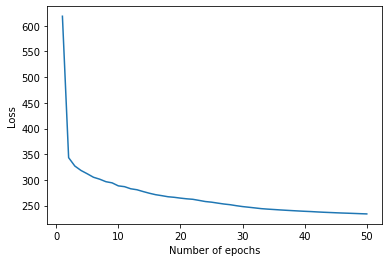

  2%|▏         | 1/50 [00:01<01:00,  1.23s/it]

Epoch: 01/50, Train Similarity: 0.9385, Validation Similarity: 0.9353. Training time so far: 1.2 s
LOSS: 863.0419


  4%|▍         | 2/50 [00:02<00:56,  1.18s/it]

Epoch: 02/50, Train Similarity: 0.9394, Validation Similarity: 0.9363. Training time so far: 2.4 s
LOSS: 537.1974


  6%|▌         | 3/50 [00:03<00:55,  1.17s/it]

Epoch: 03/50, Train Similarity: 0.9400, Validation Similarity: 0.9368. Training time so far: 3.5 s
LOSS: 519.0559


  8%|▊         | 4/50 [00:04<00:53,  1.16s/it]

Epoch: 04/50, Train Similarity: 0.9402, Validation Similarity: 0.9370. Training time so far: 4.7 s
LOSS: 506.2137


 10%|█         | 5/50 [00:05<00:53,  1.20s/it]

Epoch: 05/50, Train Similarity: 0.9406, Validation Similarity: 0.9374. Training time so far: 5.9 s
LOSS: 496.6319


 12%|█▏        | 6/50 [00:07<00:51,  1.18s/it]

Epoch: 06/50, Train Similarity: 0.9410, Validation Similarity: 0.9379. Training time so far: 7.1 s
LOSS: 488.1299


 14%|█▍        | 7/50 [00:08<00:50,  1.18s/it]

Epoch: 07/50, Train Similarity: 0.9416, Validation Similarity: 0.9386. Training time so far: 8.3 s
LOSS: 482.9953


 16%|█▌        | 8/50 [00:09<00:48,  1.16s/it]

Epoch: 08/50, Train Similarity: 0.9424, Validation Similarity: 0.9393. Training time so far: 9.4 s
LOSS: 470.1443


 18%|█▊        | 9/50 [00:10<00:47,  1.15s/it]

Epoch: 09/50, Train Similarity: 0.9429, Validation Similarity: 0.9398. Training time so far: 10.5 s
LOSS: 460.6903


 20%|██        | 10/50 [00:11<00:46,  1.17s/it]

Epoch: 10/50, Train Similarity: 0.9430, Validation Similarity: 0.9400. Training time so far: 11.7 s
LOSS: 454.8437


 22%|██▏       | 11/50 [00:12<00:45,  1.16s/it]

Epoch: 11/50, Train Similarity: 0.9431, Validation Similarity: 0.9401. Training time so far: 12.9 s
LOSS: 449.0464


 24%|██▍       | 12/50 [00:14<00:43,  1.16s/it]

Epoch: 12/50, Train Similarity: 0.9432, Validation Similarity: 0.9402. Training time so far: 14.0 s
LOSS: 444.5436


 26%|██▌       | 13/50 [00:15<00:42,  1.14s/it]

Epoch: 13/50, Train Similarity: 0.9432, Validation Similarity: 0.9401. Training time so far: 15.1 s
LOSS: 440.0751


 28%|██▊       | 14/50 [00:16<00:41,  1.15s/it]

Epoch: 14/50, Train Similarity: 0.9434, Validation Similarity: 0.9401. Training time so far: 16.3 s
LOSS: 436.1526


 30%|███       | 15/50 [00:17<00:40,  1.15s/it]

Epoch: 15/50, Train Similarity: 0.9435, Validation Similarity: 0.9402. Training time so far: 17.4 s
LOSS: 432.6390


 32%|███▏      | 16/50 [00:18<00:38,  1.14s/it]

Epoch: 16/50, Train Similarity: 0.9436, Validation Similarity: 0.9403. Training time so far: 18.6 s
LOSS: 429.2786


 34%|███▍      | 17/50 [00:19<00:37,  1.14s/it]

Epoch: 17/50, Train Similarity: 0.9438, Validation Similarity: 0.9405. Training time so far: 19.7 s
LOSS: 426.3178


 36%|███▌      | 18/50 [00:20<00:36,  1.13s/it]

Epoch: 18/50, Train Similarity: 0.9439, Validation Similarity: 0.9406. Training time so far: 20.8 s
LOSS: 423.6738


 38%|███▊      | 19/50 [00:21<00:34,  1.13s/it]

Epoch: 19/50, Train Similarity: 0.9443, Validation Similarity: 0.9407. Training time so far: 21.9 s
LOSS: 420.4688


 40%|████      | 20/50 [00:23<00:33,  1.13s/it]

Epoch: 20/50, Train Similarity: 0.9446, Validation Similarity: 0.9410. Training time so far: 23.1 s
LOSS: 417.1319


 42%|████▏     | 21/50 [00:24<00:32,  1.13s/it]

Epoch: 21/50, Train Similarity: 0.9448, Validation Similarity: 0.9414. Training time so far: 24.2 s
LOSS: 413.9260


 44%|████▍     | 22/50 [00:25<00:31,  1.13s/it]

Epoch: 22/50, Train Similarity: 0.9451, Validation Similarity: 0.9418. Training time so far: 25.3 s
LOSS: 410.7023


 46%|████▌     | 23/50 [00:26<00:30,  1.13s/it]

Epoch: 23/50, Train Similarity: 0.9455, Validation Similarity: 0.9422. Training time so far: 26.5 s
LOSS: 406.9737


 48%|████▊     | 24/50 [00:27<00:29,  1.14s/it]

Epoch: 24/50, Train Similarity: 0.9459, Validation Similarity: 0.9430. Training time so far: 27.6 s
LOSS: 402.7041


 50%|█████     | 25/50 [00:28<00:28,  1.15s/it]

Epoch: 25/50, Train Similarity: 0.9463, Validation Similarity: 0.9435. Training time so far: 28.8 s
LOSS: 398.2225


 52%|█████▏    | 26/50 [00:29<00:27,  1.15s/it]

Epoch: 26/50, Train Similarity: 0.9465, Validation Similarity: 0.9438. Training time so far: 29.9 s
LOSS: 394.2989


 54%|█████▍    | 27/50 [00:31<00:26,  1.14s/it]

Epoch: 27/50, Train Similarity: 0.9467, Validation Similarity: 0.9439. Training time so far: 31.1 s
LOSS: 391.4918


 56%|█████▌    | 28/50 [00:32<00:25,  1.14s/it]

Epoch: 28/50, Train Similarity: 0.9468, Validation Similarity: 0.9440. Training time so far: 32.2 s
LOSS: 389.0955


 58%|█████▊    | 29/50 [00:33<00:23,  1.14s/it]

Epoch: 29/50, Train Similarity: 0.9469, Validation Similarity: 0.9441. Training time so far: 33.3 s
LOSS: 387.0372


 60%|██████    | 30/50 [00:34<00:22,  1.15s/it]

Epoch: 30/50, Train Similarity: 0.9471, Validation Similarity: 0.9442. Training time so far: 34.5 s
LOSS: 385.1725


 62%|██████▏   | 31/50 [00:35<00:21,  1.15s/it]

Epoch: 31/50, Train Similarity: 0.9472, Validation Similarity: 0.9442. Training time so far: 35.7 s
LOSS: 383.9559


 64%|██████▍   | 32/50 [00:36<00:20,  1.15s/it]

Epoch: 32/50, Train Similarity: 0.9473, Validation Similarity: 0.9442. Training time so far: 36.8 s
LOSS: 382.5315


 66%|██████▌   | 33/50 [00:37<00:19,  1.14s/it]

Epoch: 33/50, Train Similarity: 0.9473, Validation Similarity: 0.9442. Training time so far: 37.9 s
LOSS: 381.3309


 68%|██████▊   | 34/50 [00:39<00:18,  1.14s/it]

Epoch: 34/50, Train Similarity: 0.9474, Validation Similarity: 0.9441. Training time so far: 39.1 s
LOSS: 380.1296


 70%|███████   | 35/50 [00:40<00:17,  1.14s/it]

Epoch: 35/50, Train Similarity: 0.9474, Validation Similarity: 0.9441. Training time so far: 40.2 s
LOSS: 379.0176


 72%|███████▏  | 36/50 [00:41<00:16,  1.17s/it]

Epoch: 36/50, Train Similarity: 0.9474, Validation Similarity: 0.9441. Training time so far: 41.4 s
LOSS: 378.1144


 74%|███████▍  | 37/50 [00:42<00:14,  1.15s/it]

Epoch: 37/50, Train Similarity: 0.9475, Validation Similarity: 0.9441. Training time so far: 42.5 s
LOSS: 377.1919


 76%|███████▌  | 38/50 [00:43<00:13,  1.15s/it]

Epoch: 38/50, Train Similarity: 0.9475, Validation Similarity: 0.9441. Training time so far: 43.7 s
LOSS: 376.3555


 78%|███████▊  | 39/50 [00:44<00:12,  1.14s/it]

Epoch: 39/50, Train Similarity: 0.9475, Validation Similarity: 0.9441. Training time so far: 44.8 s
LOSS: 375.5394


 80%|████████  | 40/50 [00:46<00:11,  1.15s/it]

Epoch: 40/50, Train Similarity: 0.9476, Validation Similarity: 0.9441. Training time so far: 46.0 s
LOSS: 374.9158


 82%|████████▏ | 41/50 [00:47<00:10,  1.15s/it]

Epoch: 41/50, Train Similarity: 0.9476, Validation Similarity: 0.9440. Training time so far: 47.1 s
LOSS: 374.1704


 84%|████████▍ | 42/50 [00:48<00:09,  1.14s/it]

Epoch: 42/50, Train Similarity: 0.9476, Validation Similarity: 0.9441. Training time so far: 48.3 s
LOSS: 373.5737


 86%|████████▌ | 43/50 [00:49<00:07,  1.14s/it]

Epoch: 43/50, Train Similarity: 0.9476, Validation Similarity: 0.9440. Training time so far: 49.4 s
LOSS: 372.7971


 88%|████████▊ | 44/50 [00:50<00:06,  1.15s/it]

Epoch: 44/50, Train Similarity: 0.9476, Validation Similarity: 0.9439. Training time so far: 50.6 s
LOSS: 372.2048


 90%|█████████ | 45/50 [00:51<00:05,  1.14s/it]

Epoch: 45/50, Train Similarity: 0.9476, Validation Similarity: 0.9439. Training time so far: 51.7 s
LOSS: 371.5780


 92%|█████████▏| 46/50 [00:52<00:04,  1.15s/it]

Epoch: 46/50, Train Similarity: 0.9476, Validation Similarity: 0.9439. Training time so far: 52.9 s
LOSS: 370.9868


 94%|█████████▍| 47/50 [00:54<00:03,  1.16s/it]

Epoch: 47/50, Train Similarity: 0.9477, Validation Similarity: 0.9440. Training time so far: 54.0 s
LOSS: 370.4263


 96%|█████████▌| 48/50 [00:55<00:02,  1.14s/it]

Epoch: 48/50, Train Similarity: 0.9477, Validation Similarity: 0.9439. Training time so far: 55.2 s
LOSS: 369.8455


 98%|█████████▊| 49/50 [00:56<00:01,  1.16s/it]

Epoch: 49/50, Train Similarity: 0.9478, Validation Similarity: 0.9439. Training time so far: 56.3 s
LOSS: 369.3622


100%|██████████| 50/50 [00:57<00:00,  1.15s/it]

Epoch: 50/50, Train Similarity: 0.9478, Validation Similarity: 0.9440. Training time so far: 57.5 s
LOSS: 368.8285


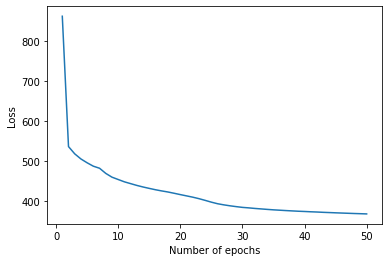

In [ ]:
# prepare data
input_data, label_data_1, label_data_2, label_data_3 = data_transformation(positions_train, velocities_train, charges_train)
train_dataset_1 = MyDataset(input_data, label_data_1)
train_dataset_2 = MyDataset(input_data, label_data_2)
train_dataset_3 = MyDataset(input_data, label_data_3)

valid_data, valid_label_data_1, valid_label_data_2, valid_label_data_3 = data_transformation(positions_valid, velocities_valid, charges_valid)
valid_dataset_1 = MyDataset(valid_data, valid_label_data_1)
valid_dataset_2 = MyDataset(valid_data, valid_label_data_2)
valid_dataset_3 = MyDataset(valid_data, valid_label_data_3)
valid_DataLoader_1 = torch.utils.data.DataLoader(valid_dataset_1, batch_size=100)
valid_DataLoader_2 = torch.utils.data.DataLoader(valid_dataset_2, batch_size=100)
valid_DataLoader_3 = torch.utils.data.DataLoader(valid_dataset_3, batch_size=100)


# device
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device=torch.device('cpu')
# criterion
criterion = MSELoss()
# trainer
trainer = Trainer(device=device,
                  criterion=criterion,
                  epochs=50)


# model one: using data in timpoint 0 to predict timepoint 0.5
model_1 = Network().to(device)
# optimizer
optimizer_1 = torch.optim.SGD(model_1.parameters(), lr=0.0001, momentum=0.5)
# data loader
train_loader_1 = torch.utils.data.DataLoader(train_dataset_1, batch_size=100)
# start training
trainer.run_trainer(model_1, train_loader_1,valid_DataLoader_1, optimizer_1)

# model two: using data in timpoint 0 to predict timepoint 1
model_2 = Network().to(device)
# optimizer
optimizer_2 = torch.optim.SGD(model_2.parameters(), lr=0.0001, momentum=0.5)
# data loader
train_loader_2 = torch.utils.data.DataLoader(train_dataset_2, batch_size=100)
# start training
trainer.run_trainer(model_2, train_loader_2, valid_DataLoader_2, optimizer_2)

# model three: using data in timpoint 0 to predict timepoint 1.5
model_3 = Network().to(device)
# optimizer
optimizer_3 = torch.optim.SGD(model_3.parameters(), lr=0.0001, momentum=0.5)
# data loader
train_loader_3 = torch.utils.data.DataLoader(train_dataset_3, batch_size=100)
# start training
trainer.run_trainer(model_3, train_loader_3, valid_DataLoader_3, optimizer_3)



# Evaluation

In [ ]:
#todo

In [ ]:
# prepare test data
input_data, label_data_1, label_data_2, label_data_3 = data_transformation(positions_test, velocities_test, charges_test)
test_dataset_1 = MyDataset(input_data, label_data_1)
test_dataset_2 = MyDataset(input_data, label_data_2)
test_dataset_3 = MyDataset(input_data, label_data_3)
# data loader
test_DataLoader_1 = torch.utils.data.DataLoader(test_dataset_1, batch_size=100)
test_DataLoader_2 = torch.utils.data.DataLoader(test_dataset_2, batch_size=100)
test_DataLoader_3 = torch.utils.data.DataLoader(test_dataset_3, batch_size=100)

In [ ]:
# evaluation model1
accuracy_1, predictions_1 = trainer.evaluation(model_1, test_DataLoader_1)
# evaluation model2
accuracy_2, predictions_2 = trainer.evaluation(model_2, test_DataLoader_2)
# evaluation model3
accuracy_3, predictions_3 = trainer.evaluation(model_3, test_DataLoader_3)

ACCURACY: 0.9720
ACCURACY: 0.9613
ACCURACY: 0.9447


In [ ]:
something that does not run

In [ ]:
def plot_example(test_example,prediction): # initial position and velocities, and positions in the end
    fig = plt.figure()
    axes = plt.gca()
    axes.set_xlim([-5., 5.])
    axes.set_ylim([-5., 5.])
    initial=test_example[0]
    label=test_example[1]
    pred_list = prediction.tolist()
    test_arr = test_example[0].detach().numpy()
    pos = test_arr[:,:2]

    colors = ['red', 'blue', 'green', 'orange', 'brown']
    for i in range(initial.shape[-1]):
        plt.plot(initial[i,0], initial[i, 1], 'd', color=colors[i])
        plt.plot(label[i,0], label[i,1], 'x', color=colors[i]) # the correct label
        plt.plot(pred_list[i][0],pred_list[i][1], 'o',color=colors[i])
        plt.plot(initial[i,0], initial[i,0] + initial[i,2], initial[i, 1], initial[i, 1] + initial[i,3], '--', color=colors[i])
    fig.set_size_inches(7, 7)
    plt.xlim(np.min(pos)-1, np.max(pos) +1)
    plt.ylim(np.min(pos)-1, np.max(pos) +1)
    plt.plot([], [], 'd', color='black', label='initial position')
    plt.plot([], [], 'o', color='black', label='predicted final position')
    plt.plot([], [], 'x', color='black', label='actual final position')
    plt.plot([], [], '--', color='black', label='initial velocity \ndirection and magnitude')
    plt.legend()
    
    plt.show()
    return

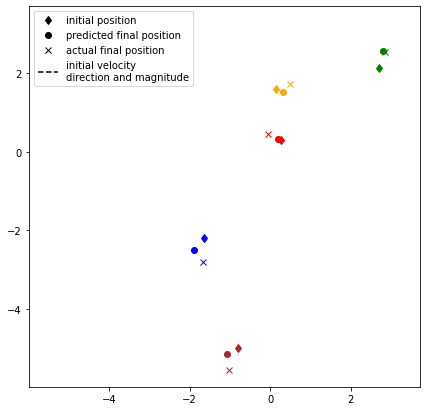

In [ ]:
random_idx = np.random.randint(0, 2000)
n_batch = int(random_idx/100)
idx_in_batch = int(random_idx%100)
plot_example(test_dataset_1[random_idx],predictions_1[n_batch][idx_in_batch])

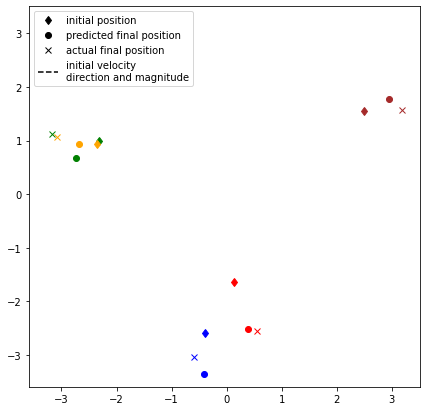

In [ ]:
random_idx = np.random.randint(0, 2000)
n_batch = int(random_idx/100)
idx_in_batch = int(random_idx%100)
plot_example(test_dataset_2[random_idx],predictions_2[n_batch][idx_in_batch])

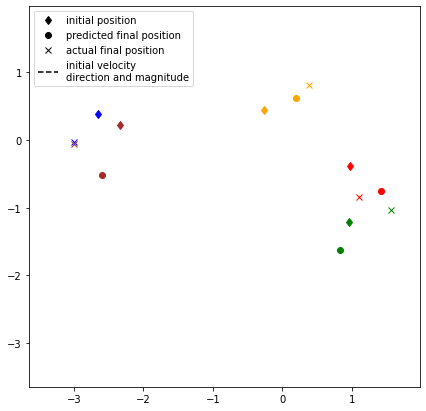

In [ ]:
random_idx = np.random.randint(0, 2000)
n_batch = int(random_idx/100)
idx_in_batch = int(random_idx%100)
plot_example(test_dataset_3[random_idx],predictions_3[n_batch][idx_in_batch])